# Nutzungsanalyse Verteilung
Überblick über die Nutzungsart der Gebäude

In [1]:
import pandas as pd
import src.package.charts as charts
import src.package.importer as im
import src.package.consts as c
import seaborn as sns
import matplotlib.pyplot as plt

# set size of seaborn plots
charts.set_plot_size(sns)

# Switch between raw and processed dataset
# df = im.get_extended_dataset('../package/datasets/full_dataset.csv')
df = im.get_dataset('../package/datasets/full_dataset.csv', raw=True)
pd.set_option('display.max_rows', 500)  # to show all value_countsö


#### Usage Cluster


In [2]:
print(df[c.FIELD_USAGE_CLUSTER].value_counts())
print("Number of different types: {}".format(len(df[c.FIELD_USAGE_CLUSTER].drop_duplicates().values)))


WOHNEN           359
SCHULEN          246
BUERO            136
HALLEN           127
BETRIEB           78
BEHERBERGUNG      77
KULTUS_KULTUR     59
GESUNDHEIT        41
ANDERES           26
OFFENE_BAUTEN     14
TECHNIK           14
IRRELEVANT        12
AUSSENANLAGEN      6
Name: usage_cluster, dtype: int64
Number of different types: 14


#### Hauptnutzung


In [3]:
print(df[c.FIELD_NOM_USAGE_MAIN].value_counts())
print("Number of different types: {}".format(len(df[c.FIELD_NOM_USAGE_MAIN].drop_duplicates().values)))

WOHNBAUTEN__MFH_MEDIUM                                                                163
SCHULBAUTEN__VOLKSSCHULEN                                                             123
WOHNBAUTEN__MFH_LOW                                                                    56
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN     55
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                       46
WOHNBAUTEN__EFH_REIHEN_MEDIUM                                                          39
BUEROBAUTEN__VOLLAUSBAU                                                                36
VERWALTUNGSBAUTEN                                                                      35
WOHNBAUTEN__MFH_HIGH                                                                   33
SCHULBAUTEN__BERUFSSCHULEN                                                             32
VERKEHRSBAUTEN__WERKHOEFE                                                              30
WOHNBAUTEN

## Nutzungen kombinieren
Der Datensatz enthält sehr unterschiedliche Datenmengen pro Nutzungstyp. Wenn zu wenig Daten vorhanden sind, macht das Verwenden des Felds 'usage_cluster' oder weiteres Zusammenfassen Sinn. Für Nutzungstypen mit vielen Daten (Wohnen, Schulen etc.) macht es Sinn, ein spezifischeren Typ zu verwenden.

**Mehrfamilienhäuser**<br>
WOHNBAUTEN__MFH_MEDIUM<br>
WOHNBAUTEN__MFH_LOW<br>
WOHNBAUTEN__MFH_HIGH<br>

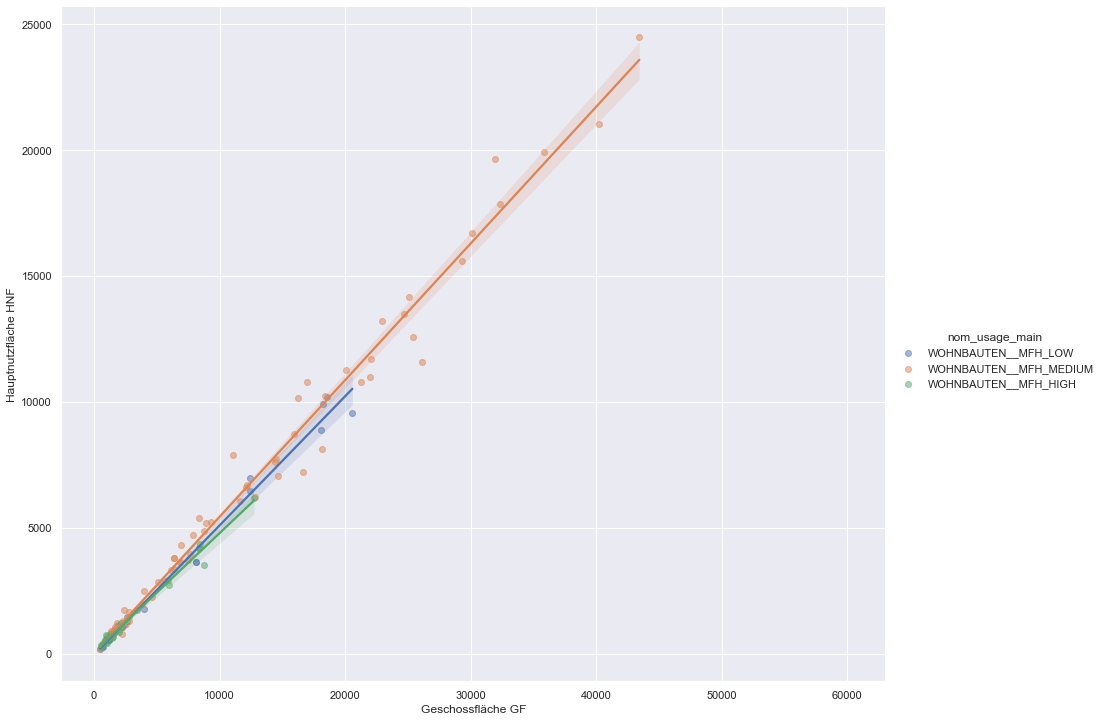

In [4]:
types_wohnen_mfh = ['WOHNBAUTEN__MFH_HIGH', 'WOHNBAUTEN__MFH_MEDIUM', 'WOHNBAUTEN__MFH_LOW']
mfh_df = df[df[c.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_mfh)]

charts.lmplot_gf_hnf(mfh_df, hue=c.FIELD_NOM_USAGE_MAIN)

**Einfamilienhäuser**<br>
WOHNBAUTEN__EFH_REIHEN_LOW<br>
WOHNBAUTEN__EFH_REIHEN_MEDIUM<br>
WOHNBAUTEN__EFH_REIHEN_HIGH

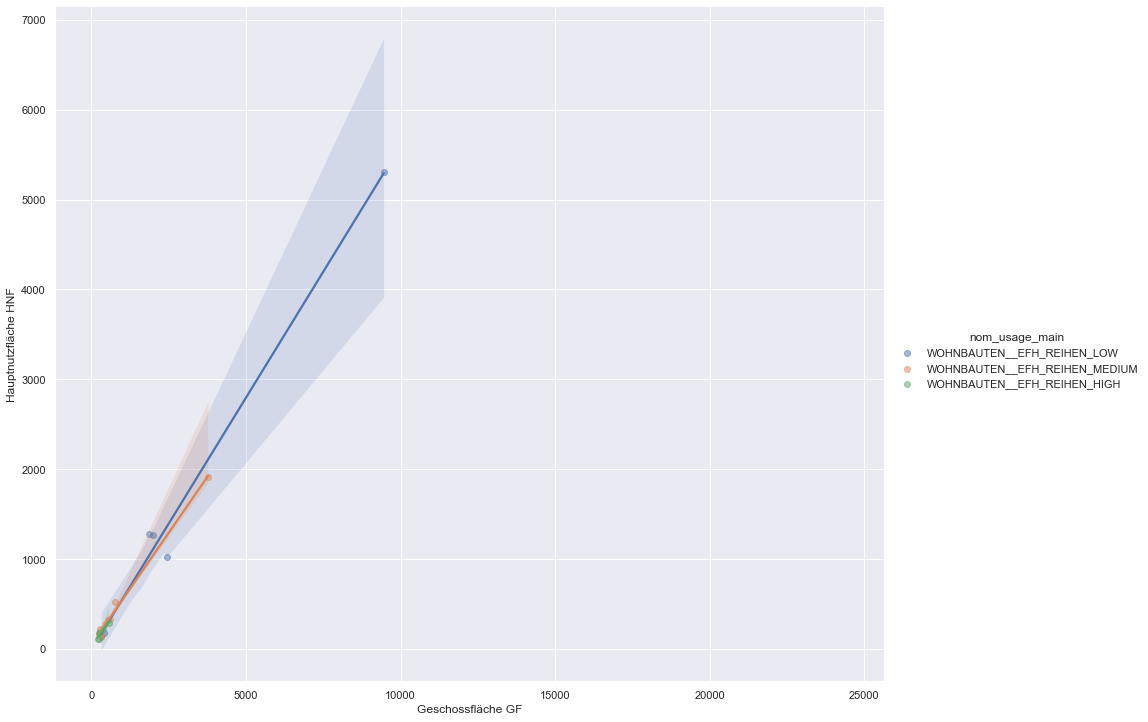

In [5]:
types_wohnen_efh = ['WOHNBAUTEN__EFH_REIHEN_LOW', 'WOHNBAUTEN__EFH_REIHEN_MEDIUM', 'WOHNBAUTEN__EFH_REIHEN_HIGH']
efh_df = df[df[c.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_efh)]

charts.lmplot_gf_hnf(efh_df, hue=c.FIELD_NOM_USAGE_MAIN)

**Schulen sinnvoll aufteilen?**<br>
SCHULBAUTEN__VOLKSSCHULEN<br>
SCHULBAUTEN__KINDERGAERTEN_HORTE<br>
SCHULBAUTEN__BERUFSSCHULEN<br>
SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR<br>
SCHULBAUTEN__BIBLIOTHEKEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR<br>
SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN<br>

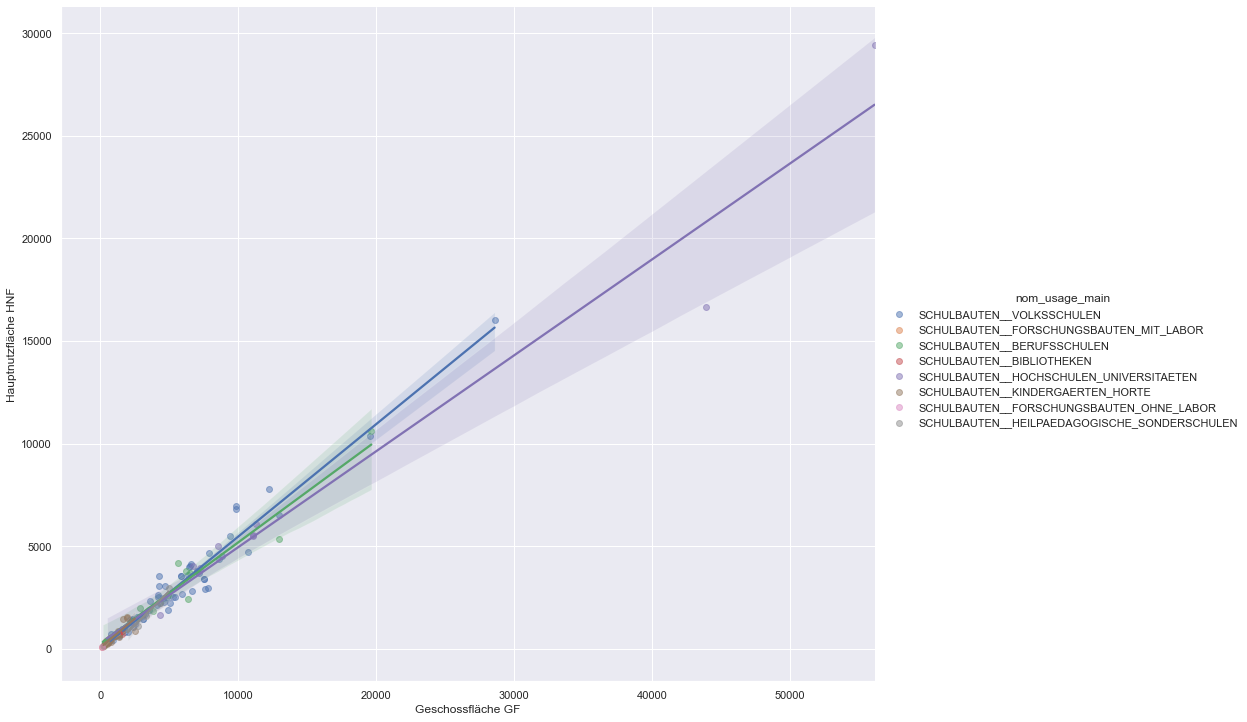

In [6]:
types_schulen = ['SCHULBAUTEN__VOLKSSCHULEN',
                 'SCHULBAUTEN__KINDERGAERTEN_HORTE',
                 'SCHULBAUTEN__BERUFSSCHULEN',
                 'SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN',
                 'SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR',
                 'SCHULBAUTEN__BIBLIOTHEKEN',
                 'SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR',
                 'SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN'
                 ]
schulen_df = df[df[c.FIELD_NOM_USAGE_MAIN].isin(types_schulen)]

charts.lmplot_gf_hnf(schulen_df, hue=c.FIELD_NOM_USAGE_MAIN)

**Rest**<br>
Vermutlich vorerst auf Usage Cluster zurückgreifen.


## Ausreisser
Ausreisser bei den Usage Clustern.

1) Description der verschiedenen Cluster. <br>
2) Ratio-Verteilung mit Ausreissern der verschiedenen Clustern – (Aussenanlagen, Betrieb, Offene Bauten und Irrelevant ausgeschlossen)<br>

In [7]:
# TODO: Uses SIA 416 only
mask = df[c.FIELD_USAGE_CLUSTER].isin(['TECHNIK', 'AUSSENANLAGEN', 'IRRELEVANT', 'OFFENE_BAUTEN'])
plotData = df[~mask]
gf = sns.catplot(x=c.FIELD_USAGE_CLUSTER, y="ratio_hnf_gf", kind="box", data=plotData)

gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# Check different cluster sizes
df[c.FIELD_USAGE_CLUSTER] = df[c.FIELD_USAGE_CLUSTER].astype('category')
# data = data[data[im.FIELD_USAGE_CLUSTER] == "BETRIEB"]
data = df[c.FIELD_HNF_GF_RATIO]
data.groupby(df[c.FIELD_USAGE_CLUSTER]).describe(percentiles=[.25, 0.4, .5, .75])

ValueError: Could not interpret input 'ratio_hnf_gf'